In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

In [7]:
faces=datasets.fetch_olivetti_faces()#人脸数据
data=faces.data
image=faces.images

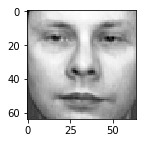

In [23]:
plt.figure(figsize=(3,2))
plt.imshow(image[36],cmap='gray')

In [13]:
target=faces.target
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [36]:
train=data[target<30]
test=data[target>30]
X_train=train[:,:2048]
Y_train=train[:,2048:]
face_upper=X_train[0].reshape((32,64))

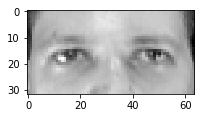

In [37]:
plt.figure(figsize=(3,2))
plt.imshow(face_upper,cmap='gray')

In [38]:
X_test=test[:,:2048]
Y_test=test[:,2048:]

In [39]:
Estimator={"KNN":KNeighborsRegressor(),
            "LinearRG":LinearRegression(),
            "Ridge":Ridge(),
            "ExtraTree":ExtraTreesRegressor()}

In [40]:
y_predict=dict()

In [50]:
for key,estimator in Estimator.items():
    estimator.fit(X_train,Y_train)
    y_new=estimator.predict(X_test)
    y_predict[key]=y_new

AttributeError: 'dict' object has no attribute 'shape'

In [46]:
face_id=np.random.randint(0,100,size=5)
face_id

array([72, 67, 53, 79, 41])

No handles with labels found to put in legend.


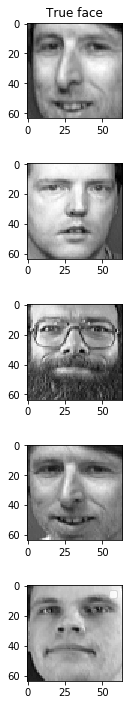

In [47]:
plt.figure(figsize=(6*2,5*2.5))
for i in range(5):
    if i:
        axes=plt.subplot(5,6,i*6+1)
    else:
        axes=plt.subplot(5,6,i*6+1,title="True face")
    axes.imshow(test[face_id[i]].reshape(64,64),cmap="gray")
    
    

plt.legend()
plt.show()

No handles with labels found to put in legend.


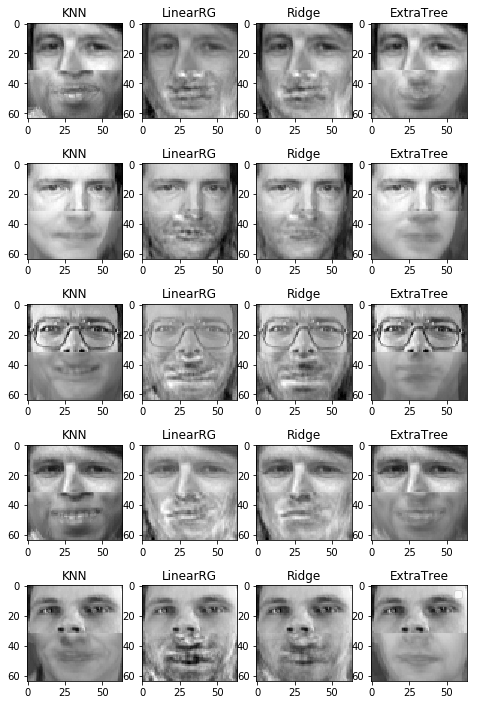

In [61]:
plt.figure(figsize=(6*2,5*2.5))
for i in range(5):
    for j,key in enumerate(y_predict):
        axes=plt.subplot(5,6,i*6+2+j,title=key)
        face_up=X_test[face_id[i]]
        face_down=(y_predict[key])[face_id[i]]
        face=np.hstack((face_up,face_down)).reshape((64,64)) 
        axes.imshow(face,cmap="gray")

plt.legend()
plt.show()

In [51]:
y_predict

{'KNN': array([[0.72314054, 0.7735537 , 0.79504126, ..., 0.16694215, 0.18347105,
         0.18842974],
        [0.6702479 , 0.71487606, 0.7272727 , ..., 0.16115704, 0.17685951,
         0.18099174],
        [0.7157025 , 0.7561984 , 0.76859504, ..., 0.11983471, 0.13388428,
         0.13636364],
        ...,
        [0.5363637 , 0.55785125, 0.57024795, ..., 0.3338843 , 0.32066116,
         0.32066116],
        [0.40330577, 0.3636364 , 0.3553719 , ..., 0.45867768, 0.4561983 ,
         0.4528926 ],
        [0.45371905, 0.51652896, 0.55289257, ..., 0.40413222, 0.36942148,
         0.37107438]], dtype=float32),
 'LinearRG': array([[ 0.8095013 ,  0.8945157 ,  0.8813785 , ...,  0.66389835,
          0.6093806 ,  0.54642904],
        [ 0.35725948,  0.57160795,  0.7912118 , ...,  0.0645538 ,
         -0.15111637, -0.09680408],
        [ 0.4369322 ,  0.664604  ,  0.7955088 , ...,  0.33139205,
          0.26691598,  0.2339133 ],
        ...,
        [ 0.50807565,  0.41918012,  0.45764768, ...,  0.